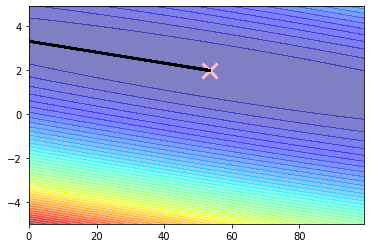

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x_data = np.array([35., 38., 31., 20., 22., 25., 17., 60., 8., 60.])
y_data = 2 * x_data + 50 + 5 * np.random.random()


bb = np.arange(0, 100, 1)  # bias
ww = np.arange(-5, 5, 0.1)  # weight
Z = np.zeros((len(bb), len(ww)))

best_loss = float("inf")



for i in range(len(bb)):
    for j in range(len(ww)):
        b = bb[i]
        w = ww[j]
        Z[j][i] = 0.0
        for n in range(len(x_data)):
            loss = Z[j][i] = Z[j][i] + (w * x_data[n] + b - y_data[n]) ** 2
            if loss < best_loss:
                best_loss = loss

        Z[j][i] = Z[j][i] / len(x_data)

history = grad_des(x_data, y_data)

plt.contourf(bb,ww,Z, 50, alpha =0.5, cmap = plt.get_cmap('jet'))
plt.plot(history[0], history[1], 'x', ms=15, markeredgewidth=3, color='pink')
plt.plot(history[2], history[3], '.', ms=3, markeredgewidth=0.01, color='black')


plt.show()


In [ ]:
def grad_des(x,y, lr = 0.0001, iterations = 30000):
  b = 0 # initial b
  w = 0 # initial w

  b_history = [b]
  w_history = [w]

  for i in range(iterations):
    guess = []
    for xval in x:
      guess.append(w * xval + b) #Erik showing me this is where it all clicked

    b_sum = 0.0
    w_sum = 0.0

    for j in range(len(x)):

      b_sum = b_sum + (guess[j] - y[j])
      w_sum = w_sum + (guess[j] - y[j]) * x[j]

    b = b - ( lr * b_sum )
    w = w - ( lr * w_sum )

    w_history.append(w)
    b_history.append(b)

  return [ b, w, b_history, w_history ] #this is kind of a convoluted way to return the data but it works
